<a href="https://colab.research.google.com/github/sahankrt20/NETFLIX-STOCK-MARKET-PREDICTION/blob/main/stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATASET** -https://www.kaggle.com/datasets/rafaeltiedra/nflx-csv-file?select=NFLX.csv

# DATA PREPROCESSING

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')

In [2]:
from google.colab import files
uploaded=files.upload()

Saving NFLX.csv to NFLX.csv


In [3]:
df=pd.read_csv("NFLX.csv")

In [4]:
df.shape

(3119, 7)

In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
df.reset_index(inplace=True)
df.columns

Index(['index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
df['Date']

,Date
0,2010-01-04
1,2010-01-05
2,2010-01-06
3,2010-01-07
4,2010-01-08
...,...
3114,2022-05-17
3115,2022-05-18
3116,2022-05-19
3117,2022-05-20


# FEATURE ENGINEERING

In [8]:
df['Price Change']=df['Close']-df['Open']

In [9]:
df['Price Change']

,Price Change
0,-0.291429
1,-0.294286
2,0.255714
3,-0.245715
4,0.115715
...,...
3114,1.390000
3115,-9.529999
3116,5.429993
3117,0.480011


In [10]:
df

,index,Date,Open,High,Low,Close,Adj Close,Volume,Price Change
0,0,2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600,-0.291429
1,1,2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100,-0.294286
2,2,2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400,0.255714
3,3,2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400,-0.245715
4,4,2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900,0.115715
...,...,...,...,...,...,...,...,...,...
3114,3114,2022-05-17,189.169998,191.399994,185.169998,190.559998,190.559998,9876700,1.390000
3115,3115,2022-05-18,186.720001,187.699997,176.270004,177.190002,177.190002,9665600,-9.529999
3116,3116,2022-05-19,178.050003,186.300003,175.710007,183.479996,183.479996,10448500,5.429993
3117,3117,2022-05-20,185.869995,190.190002,179.770004,186.350006,186.350006,10422600,0.480011


In [11]:
df['Range']=df['High']-df['Low']

In [12]:
df['Range']

,Range
0,0.395715
1,0.398572
2,0.475714
3,0.294286
4,0.277143
...,...
3114,6.229996
3115,11.429993
3116,10.589996
3117,10.419998


In [13]:
df['Trade Direction'] = np.where(
    df['Price Change'] > 0, 'Price Increase',
    np.where(
        df['Price Change'] < 0, 'Price Decrease', 'Price Unchanged'
    )
)
df.sort_values(by=['Date'], ascending=[ True]).head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Range,Trade Direction
0,0,2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600,-0.291429,0.395715,Price Decrease
1,1,2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100,-0.294286,0.398572,Price Decrease
2,2,2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400,0.255714,0.475714,Price Increase
3,3,2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400,-0.245715,0.294286,Price Decrease
4,4,2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900,0.115715,0.277143,Price Increase


In [14]:
df['Cum Price Difference'] = df['Price Change'].cumsum()
df.head() #EVALUATE CUMMULATIVE DIFFERENCE

,index,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Range,Trade Direction,Cum Price Difference
0,0,2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600,-0.291429,0.395715,Price Decrease,-0.291429
1,1,2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100,-0.294286,0.398572,Price Decrease,-0.585715
2,2,2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400,0.255714,0.475714,Price Increase,-0.330001
3,3,2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400,-0.245715,0.294286,Price Decrease,-0.575716
4,4,2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900,0.115715,0.277143,Price Increase,-0.460001


# Visualization

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index if not already done
df.set_index('Date', inplace=True)

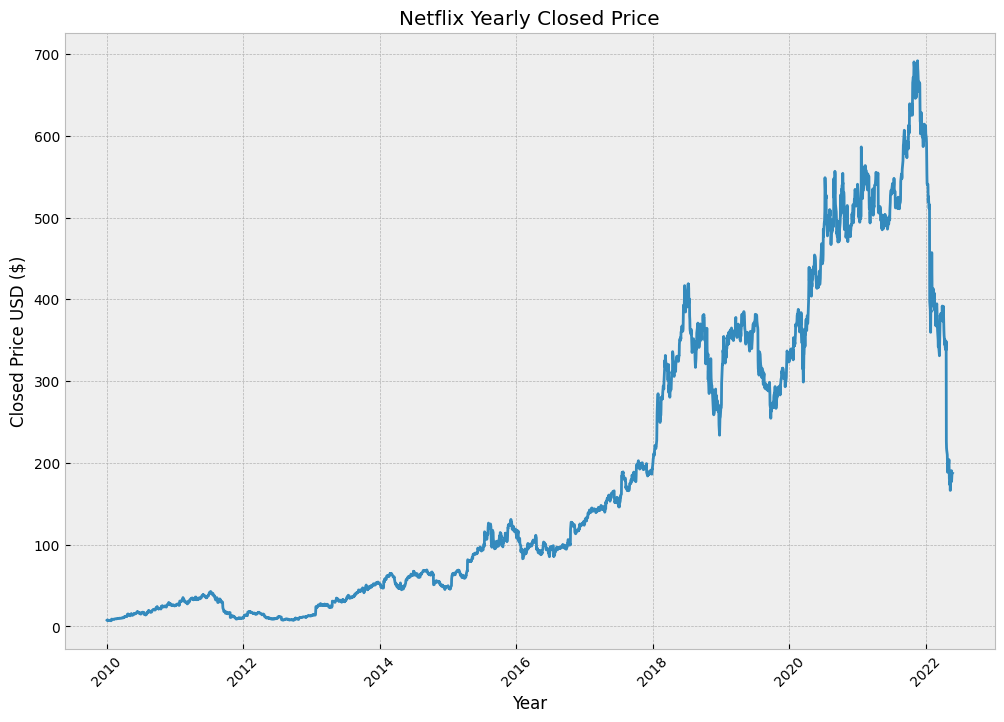

In [16]:

plt.figure(figsize=(12, 8))
plt.title("Netflix Yearly Closed Price")
plt.xlabel("Year")
plt.ylabel("Closed Price USD ($)")
plt.plot(df['Close'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

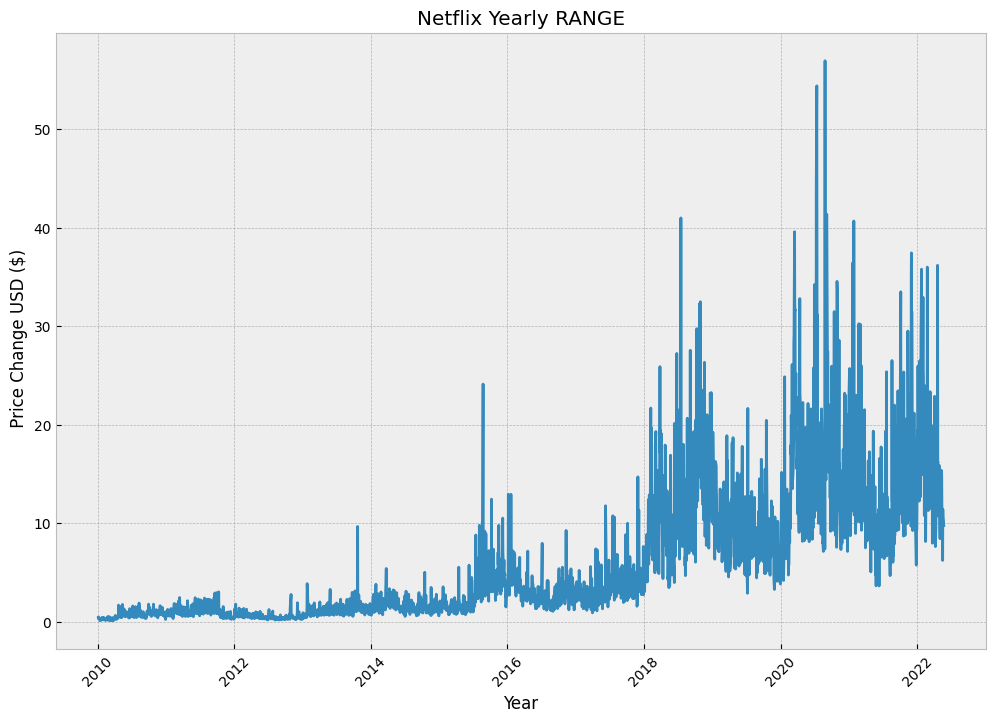

In [17]:
plt.figure(figsize=(12, 8))
plt.title("Netflix Yearly RANGE")
plt.xlabel("Year")
plt.ylabel(" Price Change USD ($)")
plt.plot(df['Range'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

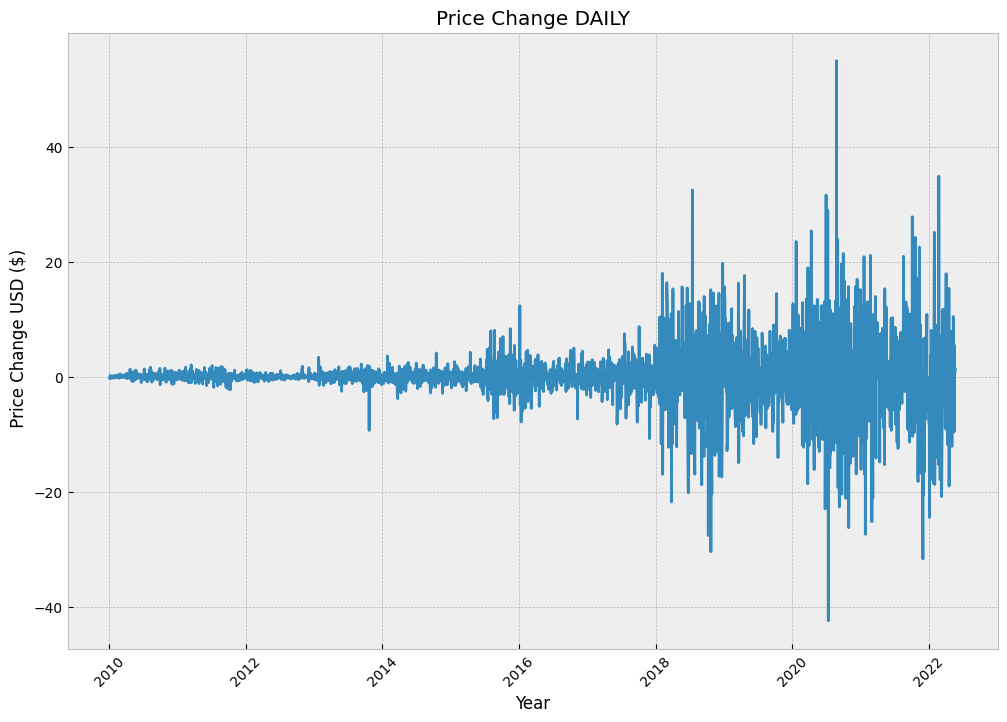

In [18]:
plt.figure(figsize=(12, 8))
plt.title("Price Change DAILY")
plt.xlabel("Year")
plt.ylabel(" Price Change USD ($)")
plt.plot(df['Price Change'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

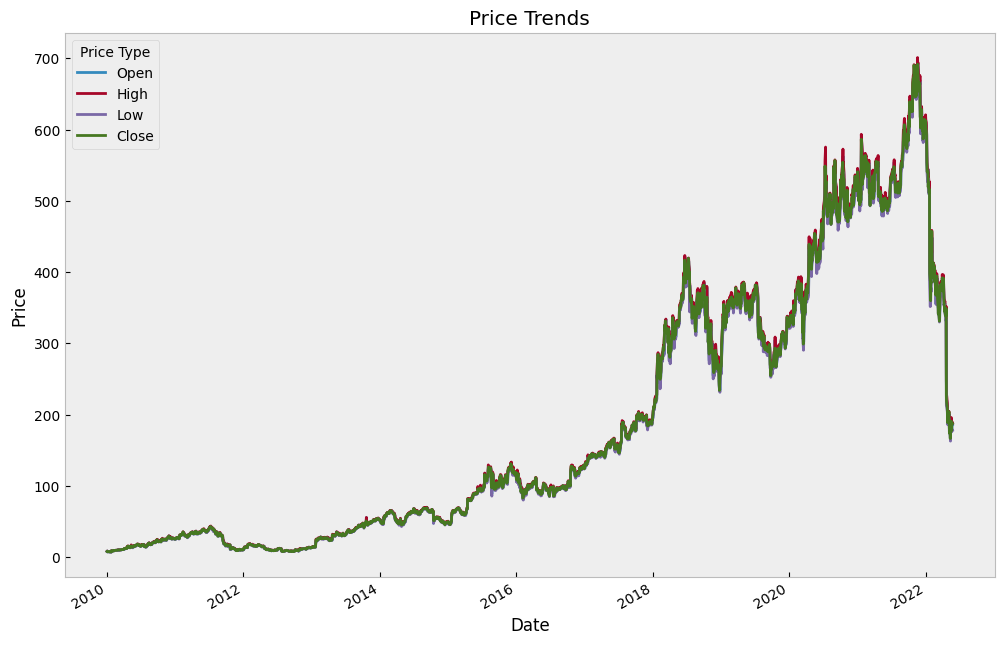

In [19]:
plt.figure(figsize=(12, 8))
df[['Open', 'High', 'Low', 'Close']].plot(ax=plt.gca())
plt.title('Price Trends')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(title='Price Type')
plt.grid()
plt.show()

<ipython-input-20-d4b1ad6e3c54>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Trade Direction', data=df, palette='pastel')


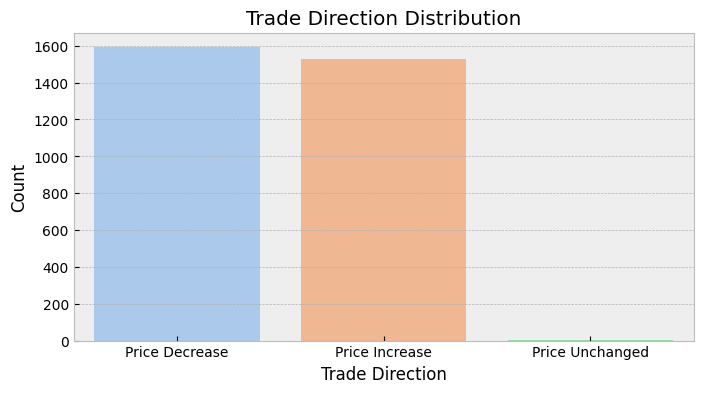

In [20]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Trade Direction', data=df, palette='pastel')
plt.title('Trade Direction Distribution')
plt.ylabel('Count')
plt.show()

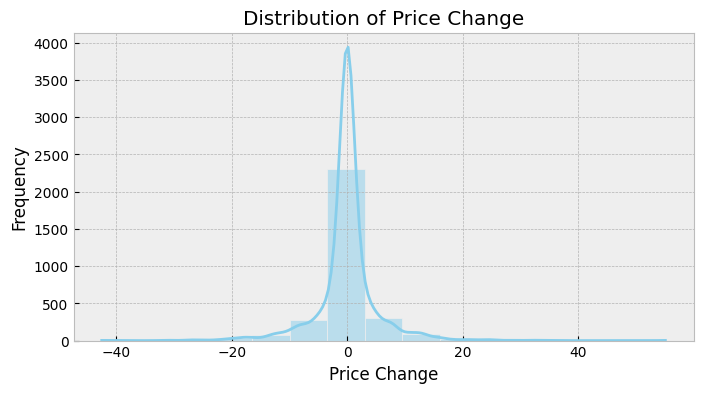

In [21]:
#HIST PLOT
plt.figure(figsize=(8, 4))
sns.histplot(df['Price Change'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Price Change')
plt.xlabel('Price Change')
plt.ylabel('Frequency')
plt.show()

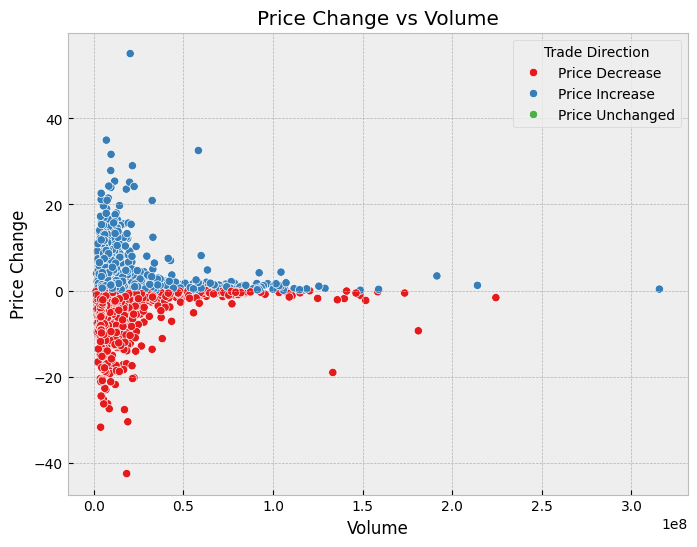

In [22]:
# 4. Scatter Plot for Price Change vs Volume
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Volume', y='Price Change', data=df, hue='Trade Direction', palette='Set1')
plt.title('Price Change vs Volume')
plt.xlabel('Volume')
plt.ylabel('Price Change')
plt.show()

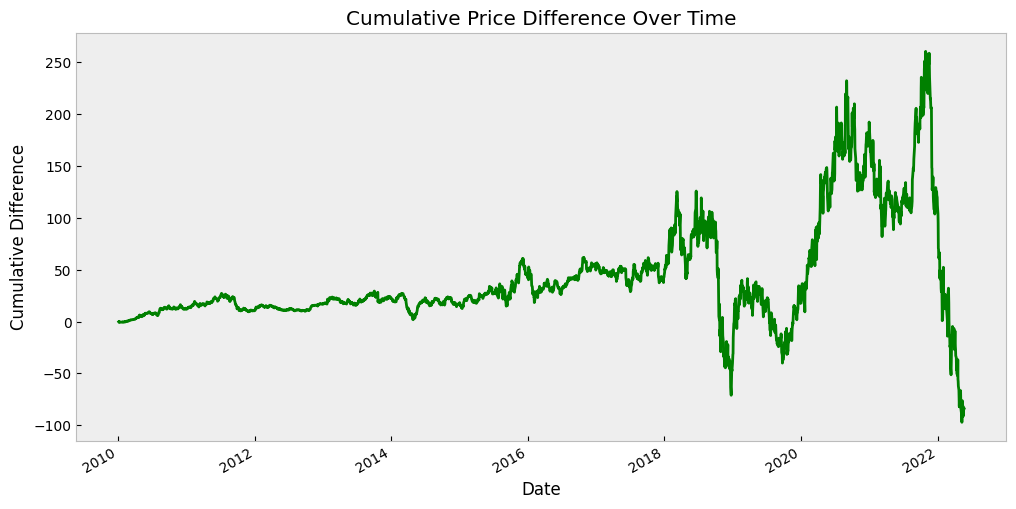

In [23]:
# 5. Cumulative Line Plot for Cum Price Difference
plt.figure(figsize=(12, 6))
df['Cum Price Difference'].plot(color='green', linewidth=2)
plt.title('Cumulative Price Difference Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Difference')
plt.grid()
plt.show()

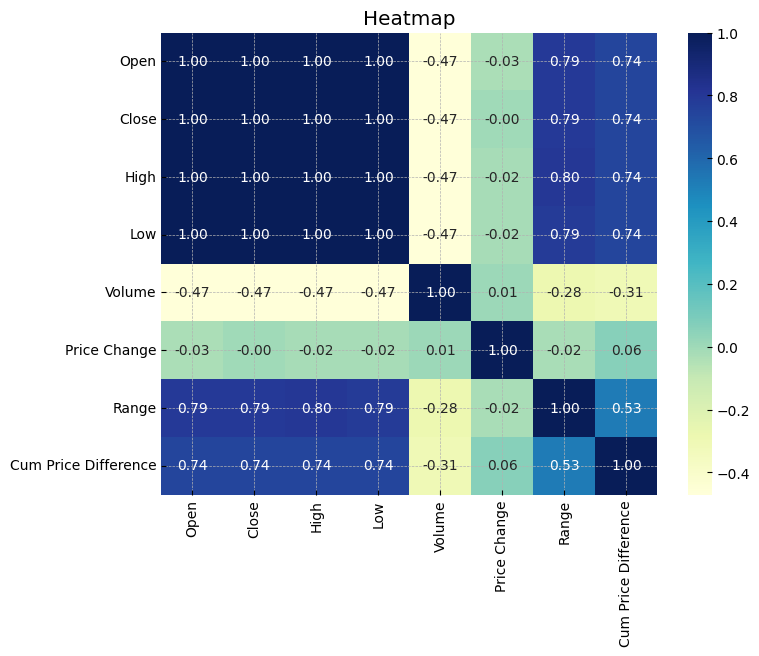

In [29]:
df_numeric=df[['Open','Close','High','Low','Volume','Price Change','Range','Cum Price Difference']]
df_corr=df_numeric.corr()
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)

# Add labels and a title
plt.title("Heatmap")
plt.show()

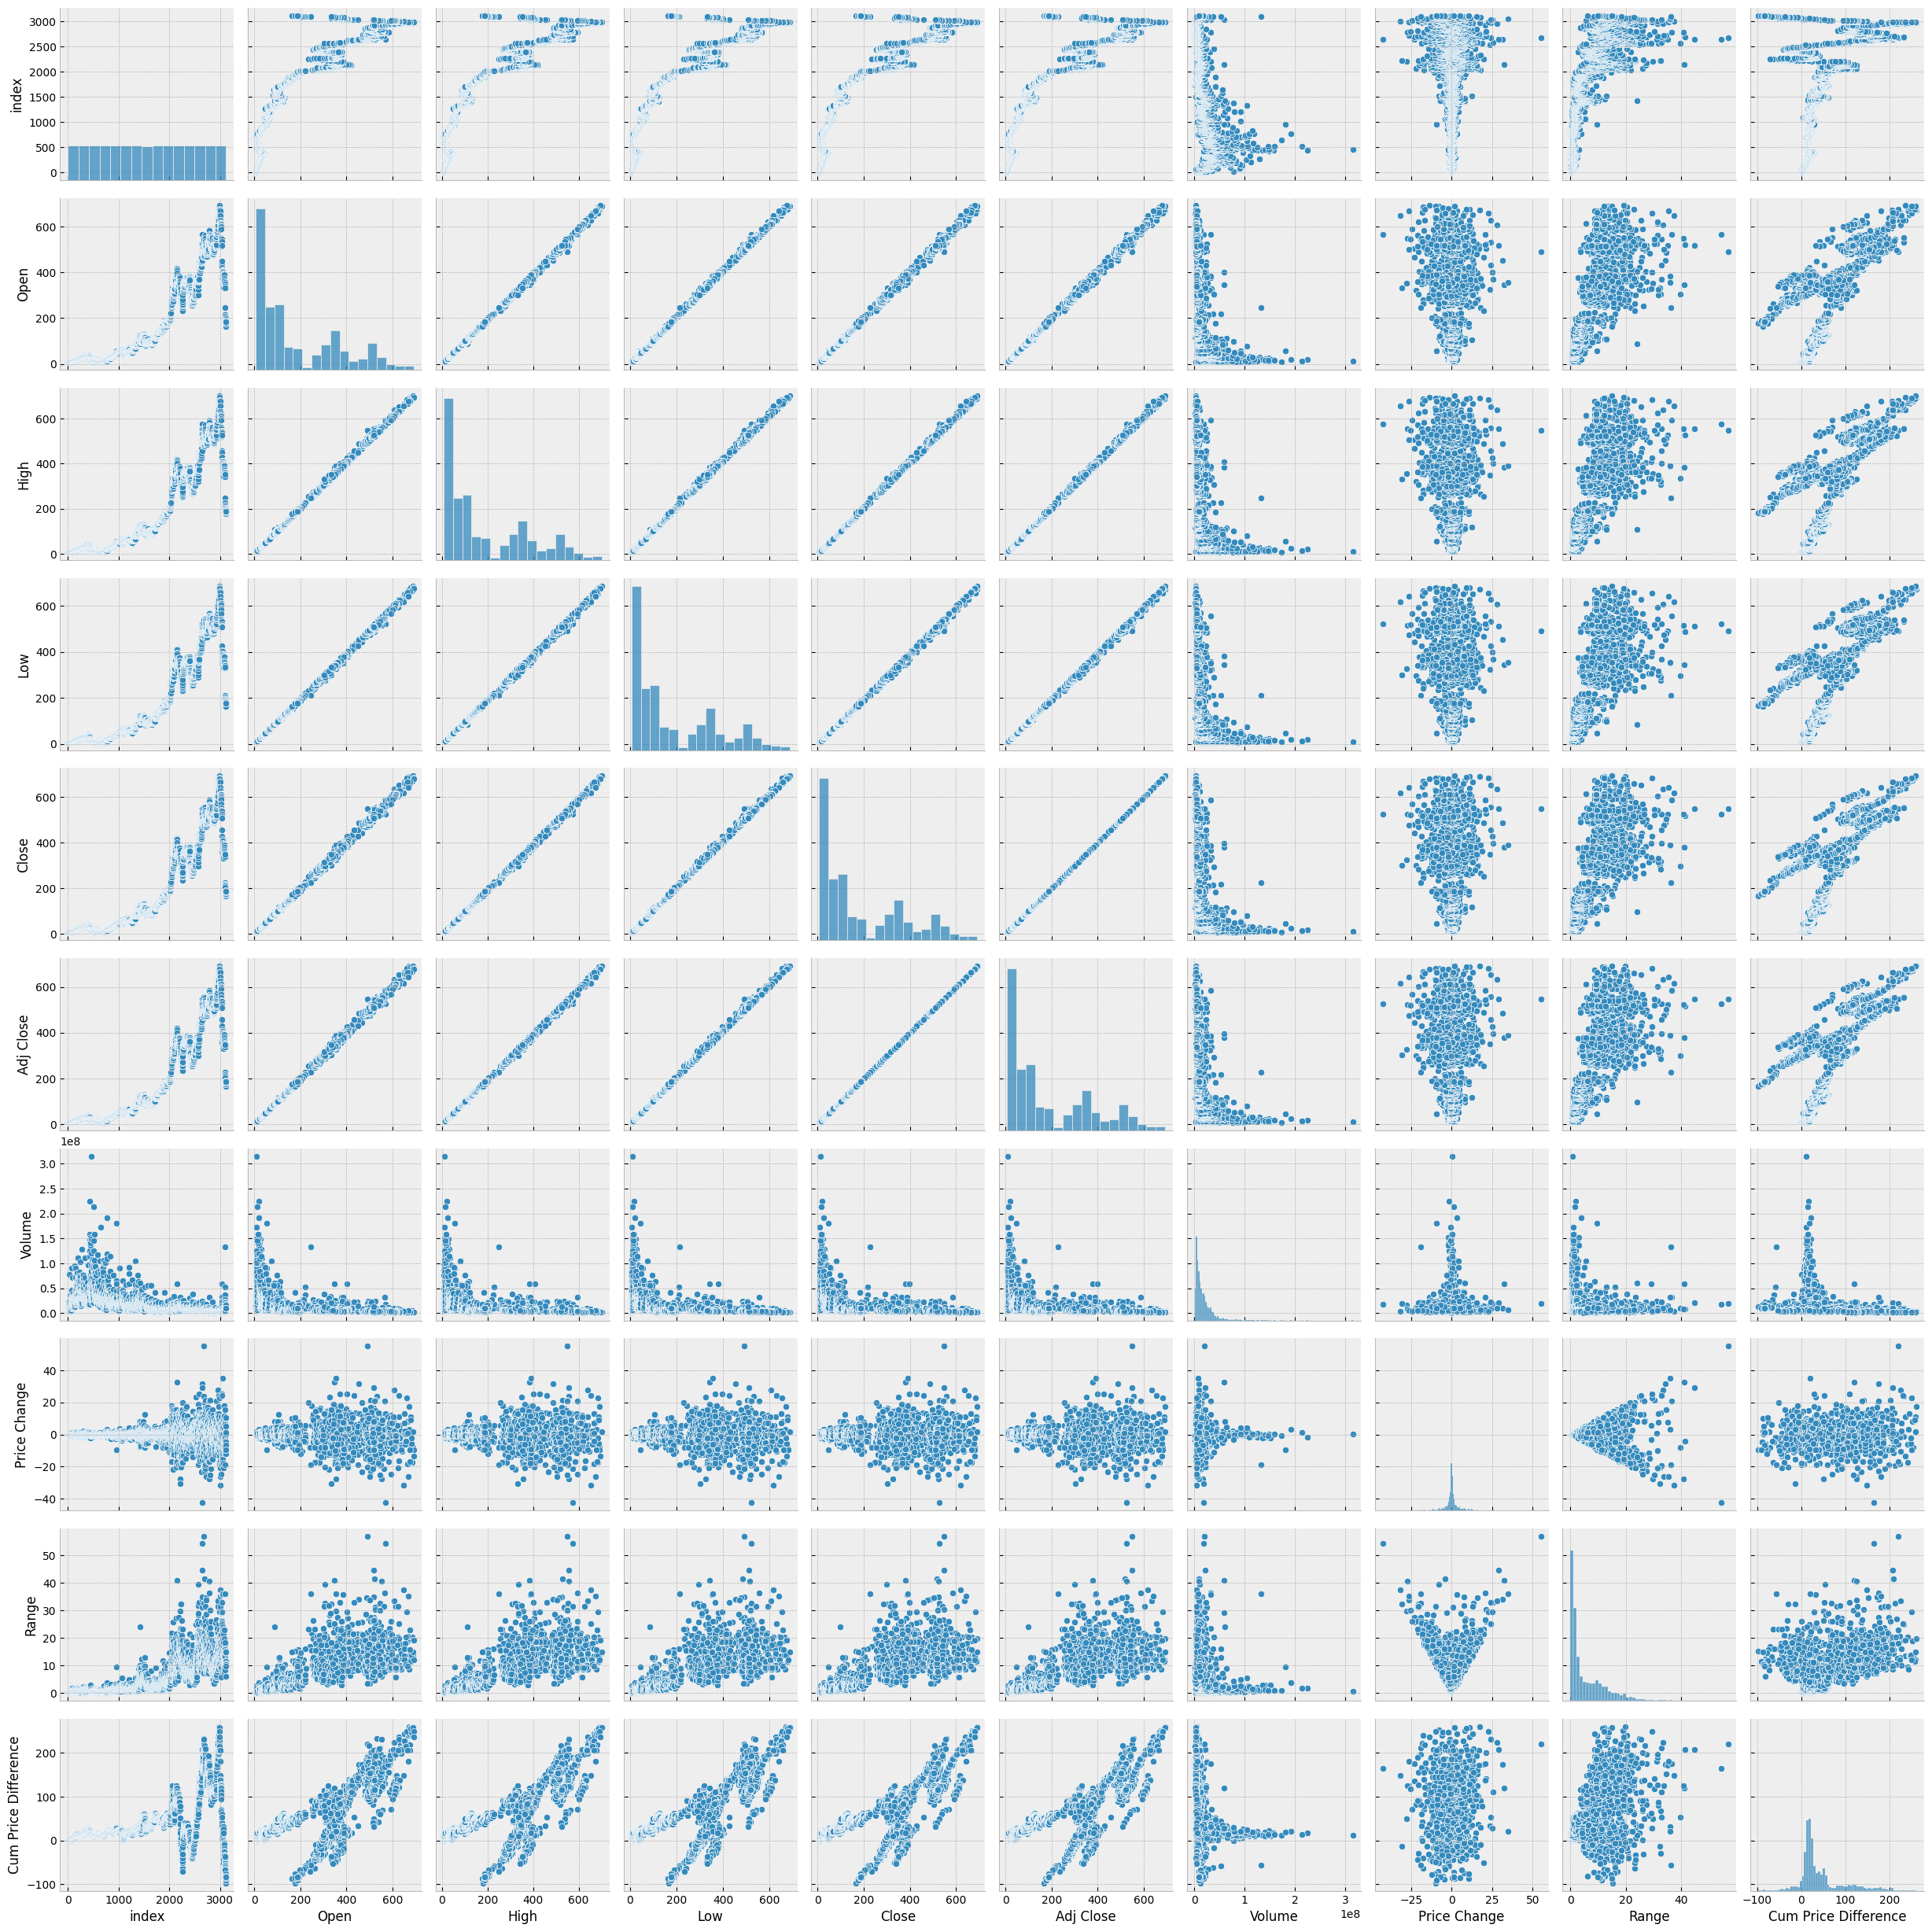

In [30]:
sns.pairplot(df)

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Volume'}>, <Axes: >]], dtype=object)

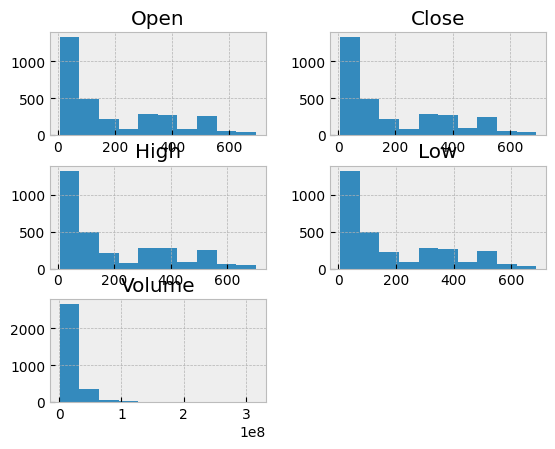

In [37]:
df[['Open','Close','High','Low','Volume']].hist()

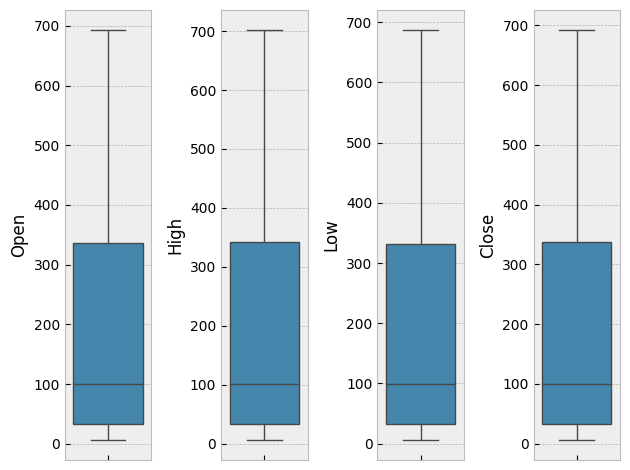

In [41]:
f,axes=plt.subplots(1,4)
sns.boxplot(y='Open',data=df,ax=axes[0])
sns.boxplot(y='High',data=df,ax=axes[1])
sns.boxplot(y='Low',data=df,ax=axes[2])
sns.boxplot(y='Close',data=df,ax=axes[3])
plt.tight_layout()


In [43]:
df.columns

Index(['index', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Price Change', 'Range', 'Trade Direction', 'Cum Price Difference'],
      dtype='object')

In [54]:
import plotly.graph_objects as go
figure=go.Figure(go.Candlestick(x=df['index'],
                                open=df['Open'],close=df['Close'],
                                low=df['Low'],high=df['High']))
figure.update_layout(title='Nextflix Stock Market Analysis',xaxis_rangeslider_visible=False)
figure.show()


**PREDICTION**

**Using LINEAR REGRESSION**

In [55]:
X=df[['High','Low','Open','Volume']].values
y=df['Close']

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)


In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score
import statsmodels.api as sm
#creating Regression model
regressor=LinearRegression()
model=regressor.fit(X_train,y_train)
#use models for predictions
y_pred=model.predict(X_test)

# Prediction

In [59]:
predicted=regressor.predict(X_test)
#to determine the shape
predicted.shape

(624,)

In [60]:
print("Model Coefficents:",regressor.coef_)
print("Model Intercept",regressor.intercept_)

Model Coefficents: [ 8.06121324e-01  7.79308295e-01 -5.85291368e-01  7.27171767e-10]
Model Intercept 0.025104406409553803


In [62]:
dframe=pd.DataFrame(y_test,predicted)
dfr=pd.DataFrame({'Actual_price':y_test,'Predicted_Price':predicted})
print(dfr)

            Actual_price  Predicted_Price
Date                                     
2011-04-12     33.417145        33.174248
2012-08-09      8.272857         8.326563
2011-05-02     33.884285        33.851823
2013-11-11     48.272858        47.897157
2016-08-12     96.589996        96.270378
...                  ...              ...
2017-10-02    177.009995       178.412272
2014-10-15     64.084290        62.731965
2016-11-22    118.040001       118.241264
2020-06-19    453.720001       450.378043
2021-10-07    631.849976       636.882490

[624 rows x 2 columns]


In [63]:
dfr.describe()

,Actual_price,Predicted_Price
count,624.000000,624.000000
mean,187.743812,187.794314
std,186.850172,186.868361
min,7.135714,7.152697
25%,32.492501,32.750851
50%,97.320000,97.721114
75%,342.512513,344.619879
max,690.309998,686.200199


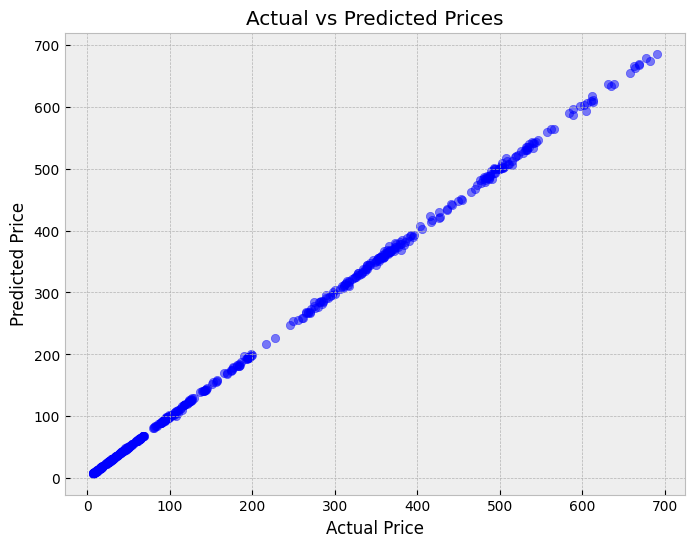

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(dfr['Actual_price'], dfr['Predicted_Price'], alpha=0.5, c='blue')
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()


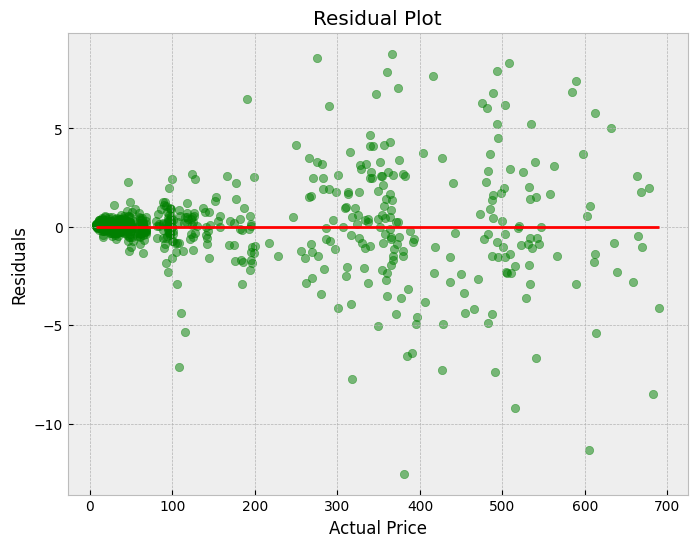

In [68]:
# Compute residuals
residuals = dfr['Predicted_Price'] - dfr['Actual_price']

plt.figure(figsize=(8, 6))
plt.scatter(dfr['Actual_price'], residuals, alpha=0.5, c='green')
plt.hlines(y=0, xmin=dfr['Actual_price'].min(), xmax=dfr['Actual_price'].max(), colors='red', linewidth=2)
plt.title("Residual Plot")
plt.xlabel("Actual Price")
plt.ylabel("Residuals")
plt.show()


<ipython-input-70-449001059fb5>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: ylabel='Density'>

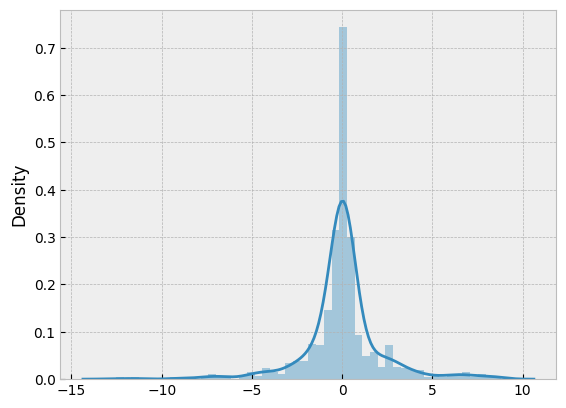

In [70]:
sns.distplot(residuals)

In [72]:
#checking the regressor score
from sklearn.metrics import confusion_matrix,accuracy_score
regression_confidence=regressor.score(X_test,y_test)
print("The linear confidence",regression_confidence)

The linear confidence 0.9998608542720354


# Model Accuracy

In [73]:
x2=abs(predicted-y_test)
y2=100*(x2/y_test)
accuracy=100-np.mean(y2)
print(f"Accuracy{accuracy}")

Accuracy99.2528789403859


In [78]:
df=df[['Close']]
df

,Close
Date,
2010-01-04,7.640000
2010-01-05,7.358571
2010-01-06,7.617143
2010-01-07,7.485714
2010-01-08,7.614286
...,...
2022-05-17,190.559998
2022-05-18,177.190002
2022-05-19,183.479996


In [ ]:
df.columns

Index(['Close'], dtype='object')

In [ ]:
future_days=1000
#Create New Column
df['Predictions']=df[['Close']].shift(-future_days)
df.tail()

<ipython-input-28-c47e893c16d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predictions']=df[['Close']].shift(-future_days)


,Close,Predictions
Date,,
2022-05-17,190.559998,NaN
2022-05-18,177.190002,NaN
2022-05-19,183.479996,NaN
2022-05-20,186.350006,NaN
2022-05-23,187.440002,NaN


In [ ]:
X = np.array(df.drop(['Predictions'], axis=1))[:-future_days]
print(X)


[[  7.64    ]
 [  7.358571]
 [  7.617143]
 ...
 [351.600006]
 [359.929993]
 [361.809998]]


In [ ]:
#Create the target dataset y and convert into numpy array
y=np.array(df['Predictions'])[:-future_days]
print(y)

[ 54.368572  54.055714  53.847141 ... 183.479996 186.350006 187.440002]


# MODEL EVALUATION

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)
tree=DecisionTreeRegressor()
tree.fit(X_train,y_train)
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R2: {r2:.2f}\n")

MAE: 100.23, MSE: 16168.81, R2: 0.49



In [ ]:
y_pred = tree.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R2: {r2:.2f}\n")

MAE: 43.74, MSE: 4407.75, R2: 0.86



**LINEAR REGRESSION** -MAE: 100.23, MSE: 16168.81, R2: 0.49

**Decision Tree Regressor**-MAE: 43.74, MSE: 4407.75, R2: 0.86

In [ ]:
# Get the last X rows of the feature dataset
X_future = df.drop(['Predictions'], axis=1)[:-future_days]  # Fixed axis specification
X_future = X_future.tail(future_days)  # Get the last 'future_days' rows
X_future = np.array(X_future)
X_future


array([[ 61.465714],
       [ 63.378571],
       [ 64.097145],
       [ 63.055714],
       [ 62.882858],
       [ 62.78857 ],
       [ 62.337143],
       [ 63.458572],
       [ 62.80143 ],
       [ 63.154285],
       [ 62.942856],
       [ 67.585716],
       [ 66.677139],
       [ 67.478569],
       [ 65.802856],
       [ 63.578571],
       [ 63.285713],
       [ 62.650002],
       [ 62.851429],
       [ 64.654289],
       [ 64.155716],
       [ 63.491428],
       [ 62.765713],
       [ 63.452858],
       [ 64.564285],
       [ 61.584286],
       [ 61.128571],
       [ 60.76857 ],
       [ 60.265713],
       [ 60.665714],
       [ 60.611427],
       [ 62.05143 ],
       [ 60.388573],
       [ 60.771427],
       [ 60.385715],
       [ 60.407143],
       [ 61.471428],
       [ 64.238571],
       [ 63.692856],
       [ 64.505714],
       [ 63.772858],
       [ 64.504288],
       [ 64.410004],
       [ 65.58429 ],
       [ 66.571426],
       [ 66.878571],
       [ 67.455711],
       [ 67.4

In [ ]:
#Show the model for tree prediction
tree_prediction=tree.predict(X_future)
print(tree_prediction)
print()

[365.799988  367.450012  361.399994  360.570007  361.450012  363.829987
 267.429993  392.869995  391.980011  390.399994  404.980011  416.76001
 380.709991  345.869995  384.480011  399.390015  355.929993  395.420013
 391.429993  398.179993  377.049988  328.899994  408.25      418.970001
 415.630005  418.649994  413.5       395.799988  400.480011  315.
 331.440002  364.230011  343.1349945 362.660004  343.1349945 362.869995
 363.089996  355.209991  334.959991  337.450012  338.380005  344.5
 343.089996  350.920013  351.829987  347.609985  345.869995  345.869995
 364.579987  337.48999   326.399994  322.440002  344.709991  327.730011
 338.019989  327.730011  339.170013  367.880005  364.579987  368.48999
 356.869995  337.48999   338.019989  348.410004  341.179993  366.959991
 350.920013  348.410004  355.929993  369.950012  368.149994  364.559998
 350.350006  355.209991  343.089996  365.359985  361.190002  369.609985
 374.130005  377.880005  380.709991  374.130005  381.429993  395.420013
 377.

In [ ]:
#Show the model for tree prediction
tree_prediction=tree.predict(X_future)
print(tree_prediction)
print()

lr_prediction=lr.predict(X_future)
print(lr_prediction)

[365.799988  367.450012  361.399994  360.570007  361.450012  363.829987
 267.429993  392.869995  391.980011  390.399994  404.980011  416.76001
 380.709991  345.869995  384.480011  399.390015  355.929993  395.420013
 391.429993  398.179993  377.049988  328.899994  408.25      418.970001
 415.630005  418.649994  413.5       395.799988  400.480011  315.
 331.440002  364.230011  343.1349945 362.660004  343.1349945 362.869995
 363.089996  355.209991  334.959991  337.450012  338.380005  344.5
 343.089996  350.920013  351.829987  347.609985  345.869995  345.869995
 364.579987  337.48999   326.399994  322.440002  344.709991  327.730011
 338.019989  327.730011  339.170013  367.880005  364.579987  368.48999
 356.869995  337.48999   338.019989  348.410004  341.179993  366.959991
 350.920013  348.410004  355.929993  369.950012  368.149994  364.559998
 350.350006  355.209991  343.089996  365.359985  361.190002  369.609985
 374.130005  377.880005  380.709991  374.130005  381.429993  395.420013
 377.

In [ ]:
prediction=tree_prediction
valid=df[X.shape[0]:]
valid['Predictions']=prediction


<ipython-input-37-4ed4a2a01545>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=prediction


# FINAL PREDICTION
Here it is the required plot for the prediction vs real of netlfix stock prices

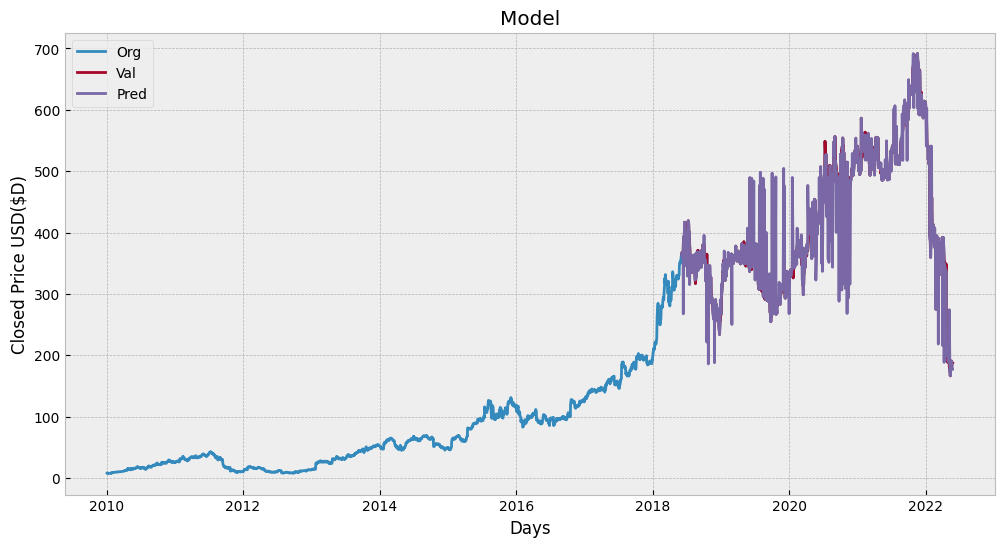

In [ ]:

plt.figure(figsize=(12,6))
plt.title('Model')
plt.xlabel("Days")
plt.ylabel("Closed Price USD($D)")
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Org','Val','Pred'])
plt.show()

